In [83]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.mpl_style = 'default'
import collections
from campaign_analysis import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Set-Up Code

In [ ]:
start = '2015-2-2 00:00'
stop = '2015-3-2 00:00'

dsk_lg = '.*lg.* C15_enIL_dsk_FR'
dsk_sm = '.*tp.* C15_enIL_dsk_FR'

mob_lg = '.*lg.* C15_enIL_mob_FR'
mob_sm = '.*sm.* C15_enIL_mob_FR'

ipd_lg = '.*lg.* C15_enIL_ipd_FR'
ipd_sm = '.*sm.* C15_enIL_ipd_FR'

In [85]:
# fetch data
click = get_clicks(start, stop)
don = get_donations(start, stop)
imp = get_impressions(start, stop)

In [156]:
# set up regular expressions for grouping data
dsk = '|'.join([dsk_lg, dsk_sm]) 
mob = '|'.join([mob_lg, mob_sm])
ipd = '|'.join([ipd_lg, ipd_sm])
lg = '|'.join([dsk_lg, mob_lg, ipd_lg]) 
sm = '|'.join([dsk_sm, mob_sm, ipd_sm]) 


all_regs = collections.OrderedDict()
all_regs['Desktop Large'] = dsk_lg
all_regs['Desktop Small'] = dsk_sm
all_regs['Mobile Large'] = mob_lg
all_regs['Mobile Small'] = mob_sm
all_regs['Ipad Large'] = ipd_lg
all_regs['Ipad Samll'] = ipd_sm


device_regs = collections.OrderedDict()
device_regs['Ipad'] = ipd
device_regs['Mobile'] = mob
device_regs['Desktop'] = dsk

size_regs = collections.OrderedDict()
size_regs['Large'] = lg
size_regs['Small'] = sm

dsk_regs = collections.OrderedDict()
dsk_regs['Large Desk'] = dsk_lg
dsk_regs['Top Desk'] = dsk_sm

mob_regs = collections.OrderedDict()
mob_regs['Large Mob'] = mob_lg
mob_regs['Small Mob'] = mob_sm

ipd_regs = collections.OrderedDict()
ipd_regs['Large Ipad'] = ipd_lg
ipd_regs['Small Ipad'] = ipd_sm

lg_regs = collections.OrderedDict()
lg_regs['Large Desk'] = dsk_lg
lg_regs['Large Mobile'] = mob_lg
lg_regs['Large Ipad'] = ipd_lg


sm_regs = collections.OrderedDict()
sm_regs['Large Desk'] = dsk_sm
sm_regs['Large Mobile'] = mob_sm
sm_regs['Large Ipad'] = ipd_sm


##Impressions: Large vs Small By Device  

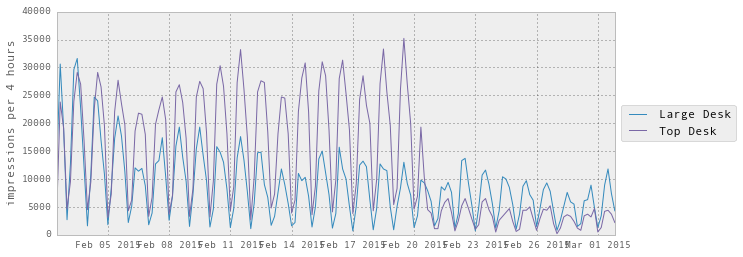

In [147]:
hours = 4
config = {
            'hours' :hours, 
            'ylabel': 'impressions per %d hours' % hours
}

plot_by_time(imp, dsk_regs, **config )


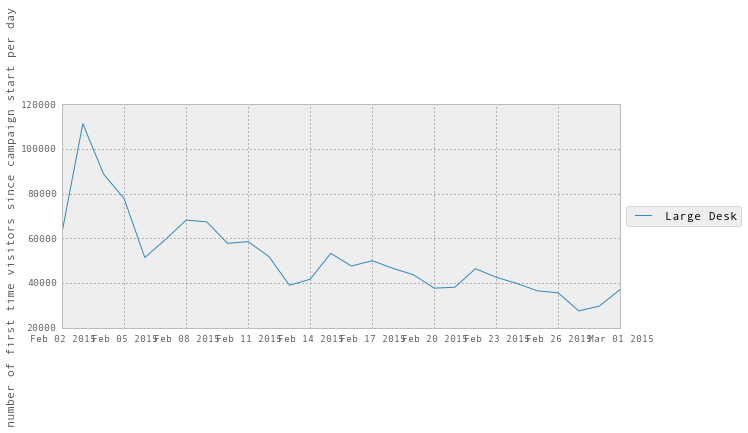

In [148]:
config = {
            'hours' :24, 
            'start': '2014-12-1 00',
            'ylabel': 'number of first time visitors since campaign start per day'
}

plot_by_time(imp, {'Large Desk': dsk_regs['Large Desk']}, **config )

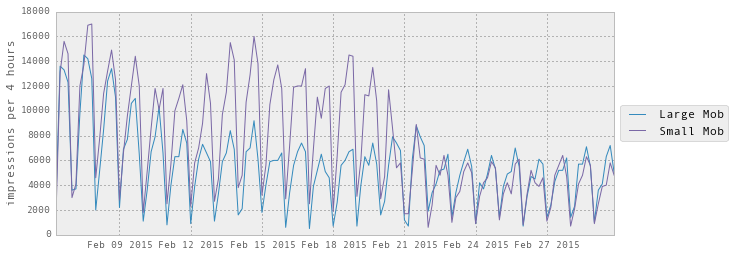

In [149]:
hours = 4
config = {
            'hours' :hours, 
            'start': '2014-12-1 00',
            'ylabel': 'impressions per %d hours' % hours

}
plot_by_time(imp, mob_regs, **config )


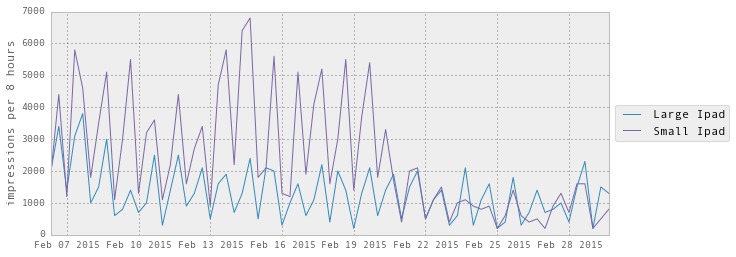

In [108]:

hours = 8
config = {
            'hours' :hours, 
            'ylabel': 'impressions per %d hours' % hours
}
plot_by_time(imp, ipd_regs, **config )

##Donations: Large vs Small By Device 

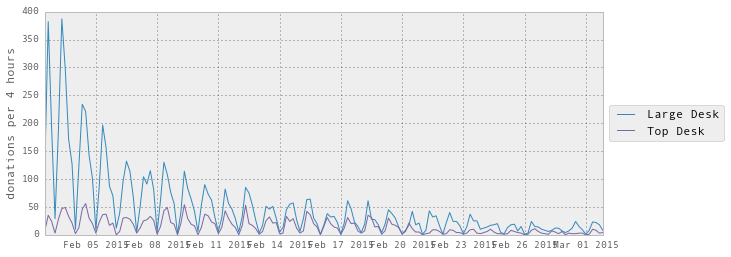

In [150]:
hours = 4
config = {
            'hours' :hours, 
            'ylabel': 'donations per %d hours' % hours
}

plot_by_time(don, dsk_regs, **config)


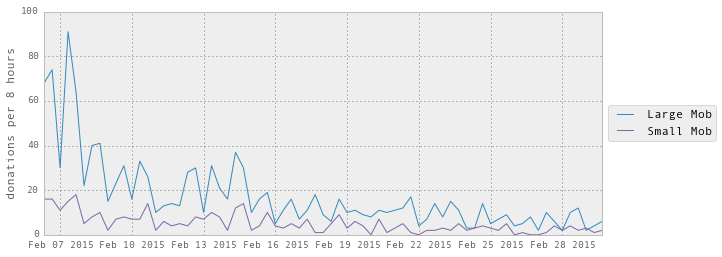

In [151]:
hours = 8
config = {
            'hours' :hours, 
            'ylabel': 'donations per %d hours' %hours
}
plot_by_time(don, mob_regs, **config )


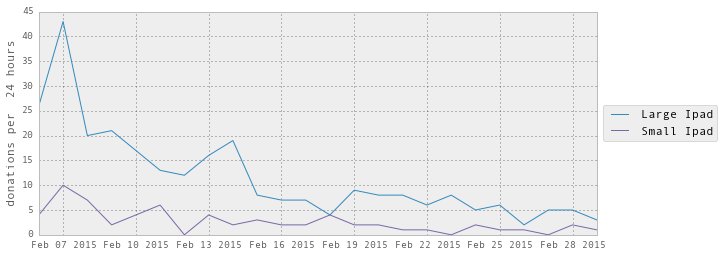

In [152]:
hours = 24
config = {
            'hours' :hours, 
            'start': '2014-12-8 00',
            'ylabel': 'donations per  %d hours' % hours
}
plot_by_time(don, ipd_regs, **config )



On the Ipad, the top screen banners quickly lead to fewer donations than the large screen  banners.

#Donation Rate: Large vs Small By Device

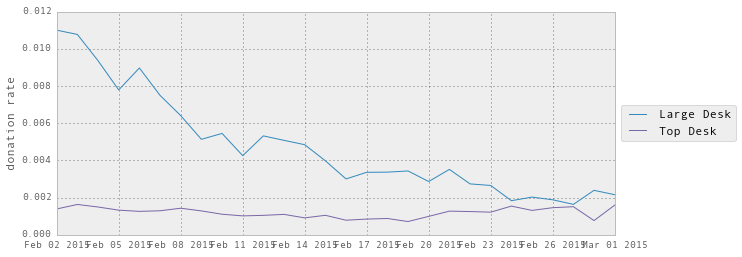

In [172]:
plot_rate_by_time(don, imp, dsk_regs, hours = 24)

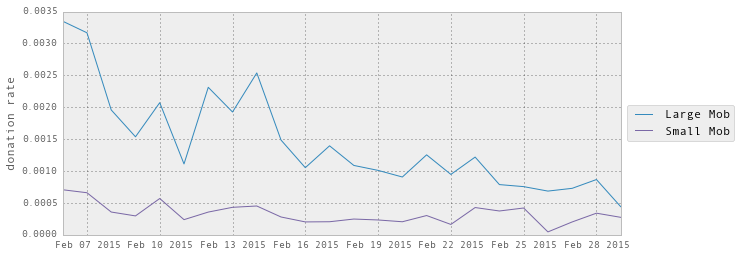

In [154]:
plot_rate_by_time(don, imp, mob_regs, hours = 48 )

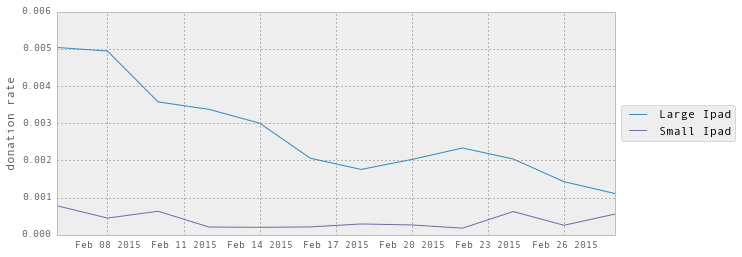

In [170]:
plot_rate_by_time(don, imp, ipd_regs, hours = 48 )

## Large Banner Donation Rate By Device

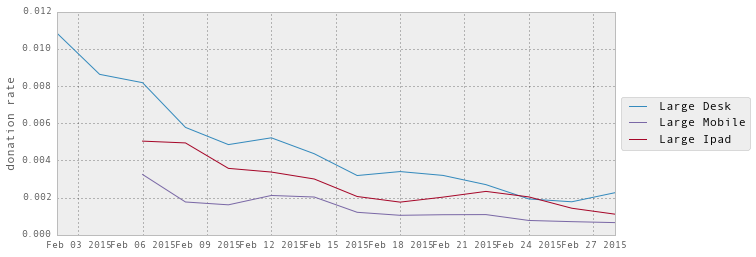

In [160]:
plot_rate_by_time(don, imp, lg_regs, hours = 48 )

## Small Banner Donation Rate By Device

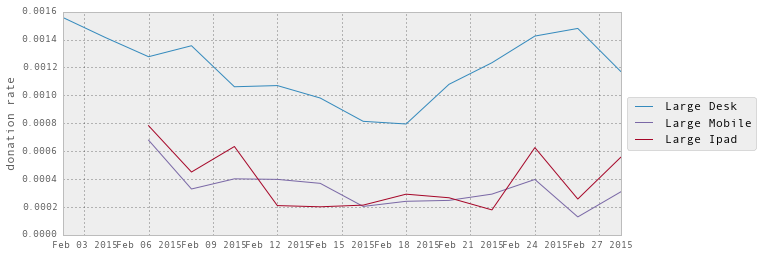

In [161]:
plot_rate_by_time(don, imp, sm_regs, hours = 48 )

## Amount/Day by Banner Size

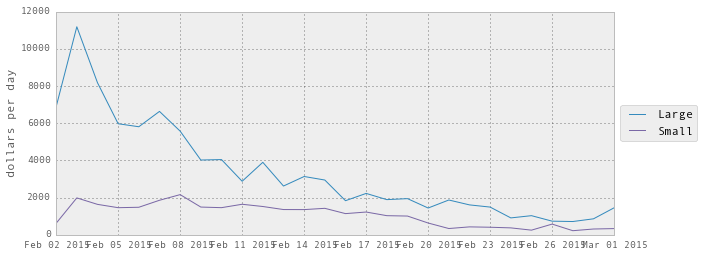

In [162]:
config = {
        'hours' : 24, 
        'amount' : True,
        'ylabel' : 'dollars per day'
}

fig = plot_by_time(don, size_regs, **config )

## Amount/Day by Device

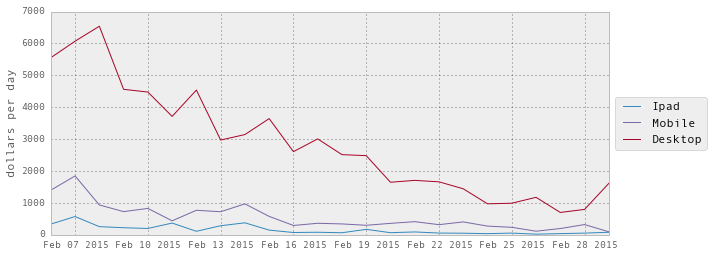

In [163]:
config = {
        'hours' : 24, 
        'amount' : True,
        'start' : '2014-12-3 00',
        'ylabel' : 'dollars per day'
}


fig = plot_by_time(don, device_regs, **config )

## Cumulative Total per Day By Device

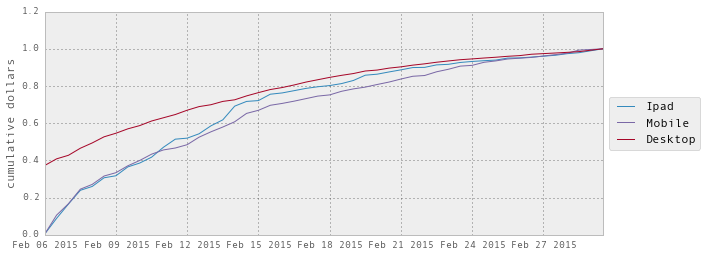

In [164]:
config = {
    'hours': 12,
    'amount': True,
    'cum' : True,
    'ylabel' : 'cumulative dollars',
    'interactive': False,
    'normalize' : True
}

plot_by_time(don, device_regs , **config)


##Quick view of Donation Amount Totals

In [165]:
def get_dollar_break_downs(regs):
    d_totals = pd.DataFrame()
    for name, reg in regs.items():
        counts = don.ix[don.name.str.match(reg).apply(bool)]['amount']
        d_totals[name] = [counts.sum()]
    return d_totals

In [166]:
get_dollar_break_downs(all_regs)

,Desktop Large,Desktop Small,Mobile Large,Mobile Small,Ipad Large,Ipad Samll
0,81192.54,25262.37,9750.11,3483.72,2830.17,966.06


In [167]:
get_dollar_break_downs(size_regs)

,Large,Small
0,93772.82,29712.15


In [168]:
get_dollar_break_downs(device_regs)

,Ipad,Mobile,Desktop
0,3796.23,13233.83,106454.91


## Quick View of Donation Number totals

In [173]:
def get_donation_number_break_downs(regs):
    d_totals = pd.DataFrame()
    for name, reg in regs.items():
        counts = don.ix[don.name.str.match(reg).apply(bool)]['n']
        d_totals[name] = [counts.sum()]
    return d_totals


In [174]:
get_donation_number_break_downs(all_regs)

,Desktop Large,Desktop Small,Mobile Large,Mobile Small,Ipad Large,Ipad Samll
0,7982,2424,1241,363,278,63


In [176]:
get_donation_number_break_downs(size_regs)

,Large,Small
0,9501,2850


In [178]:
get_donation_number_break_downs(device_regs)

,Ipad,Mobile,Desktop
0,341,1604,10406


## Quick View of Impression Number Totals

In [179]:
def get_impression_break_downs(regs):
    d_totals = pd.DataFrame()
    for name, reg in regs.items():
        counts = imp.ix[imp.name.str.match(reg).apply(bool)]['n']
        d_totals[name] = [counts.sum()]
    return d_totals

In [180]:
get_impression_break_downs(all_regs)

,Desktop Large,Desktop Small,Mobile Large,Mobile Small,Ipad Large,Ipad Samll
0,1448600,2133300,783900,1045300,93300,168100


In [181]:
get_impression_break_downs(size_regs)

,Large,Small
0,2325800,3346700


In [182]:
get_impression_break_downs(device_regs)

,Ipad,Mobile,Desktop
0,261400,1829200,3581900
